## The Sparks Foundation

### Graduate Rotational Internship Programme (GRIP)

#### `MAY 2023 Batch`
#### `Candidate Name : PRASAD JADHAV`

### Task_5 : Exploratory Data Analysis_Sports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('matches.csv')

In [4]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
df.shape

(756, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(['umpire3'], axis=1, inplace=True)

In [11]:
winner_per_season = df.groupby('season')['winner']

In [12]:
winner_per_season.value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [13]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

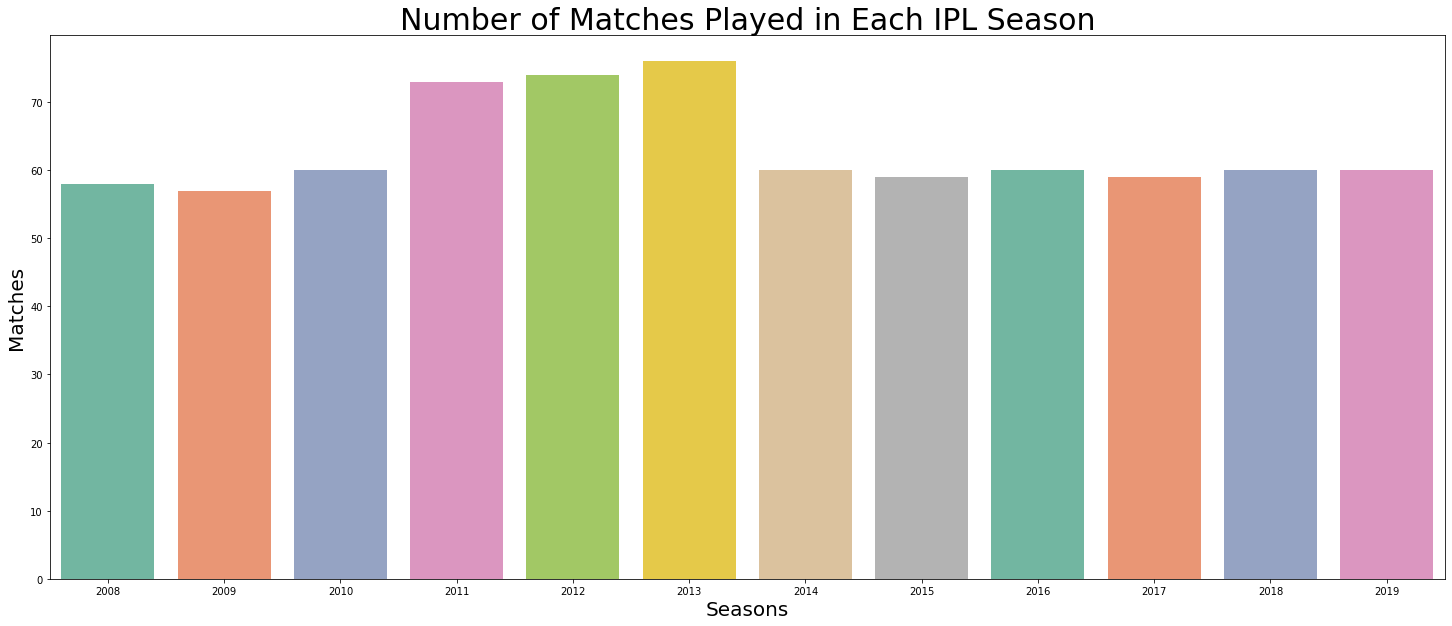

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['season'], palette='Set2')
plt.title('Number of Matches Played in Each IPL Season', fontsize=30)
plt.xlabel('Seasons', fontsize=20)
plt.ylabel('Matches', fontsize=20)
plt.show()

In [15]:
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

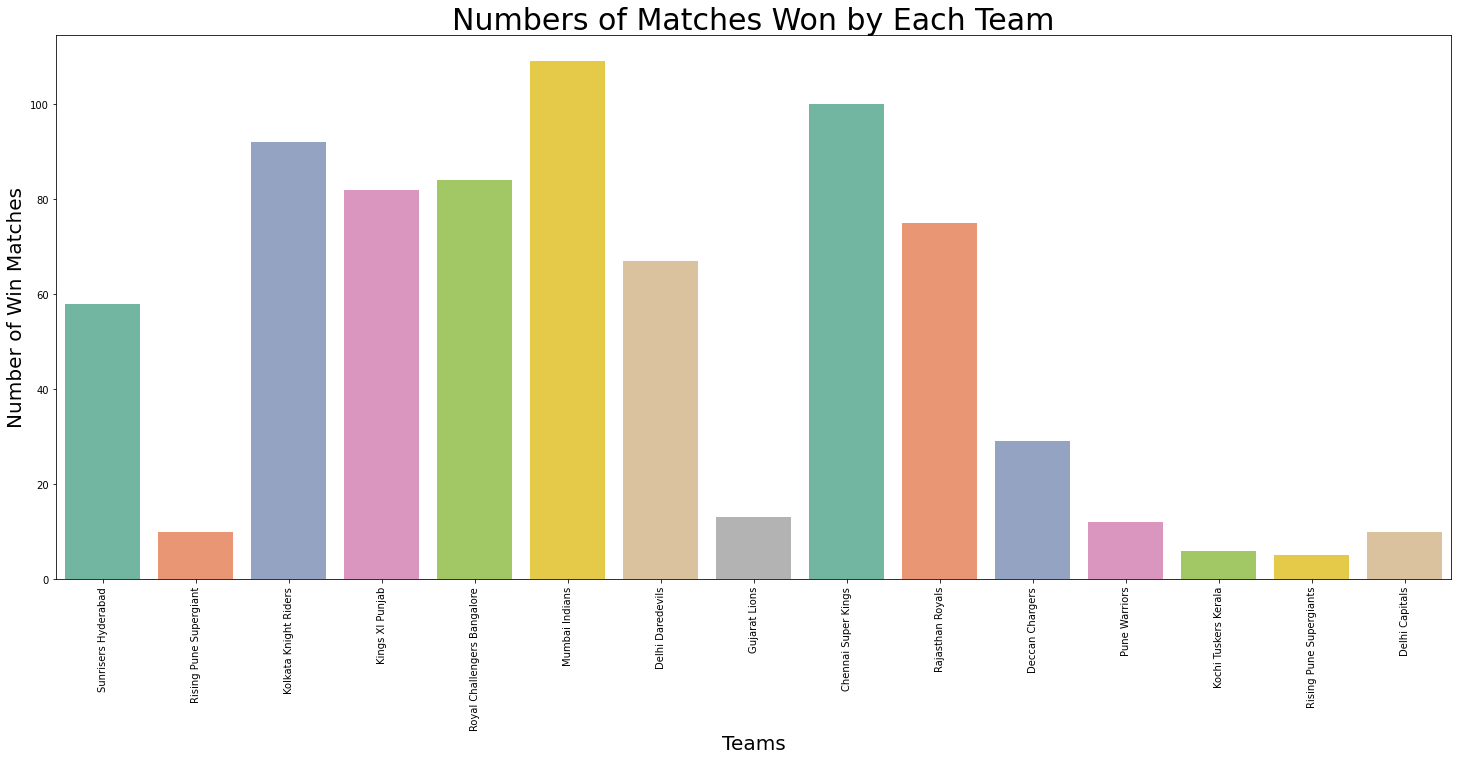

In [20]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['winner'], palette='Set2')
plt.title('Numbers of Matches Won by Each Team', fontsize=30)
plt.xticks(rotation=90, )
plt.xlabel('Teams', fontsize=20)
plt.ylabel('Number of Win Matches', fontsize=20)
plt.show()

In [21]:
df['win_by'] = np.where(df['win_by_runs']>0, 'Bat first', 'Bowl first')

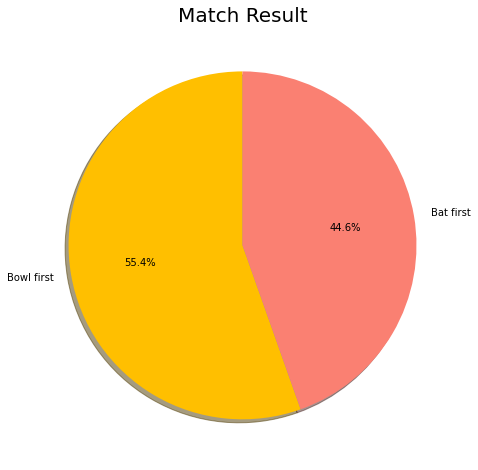

In [27]:
win = df['win_by'].value_counts()
labels = np.array(win.index)
sizes = win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Match Result', fontsize=20)
plt.show()

In [23]:
df['win_by'].value_counts()

Bowl first    419
Bat first     337
Name: win_by, dtype: int64

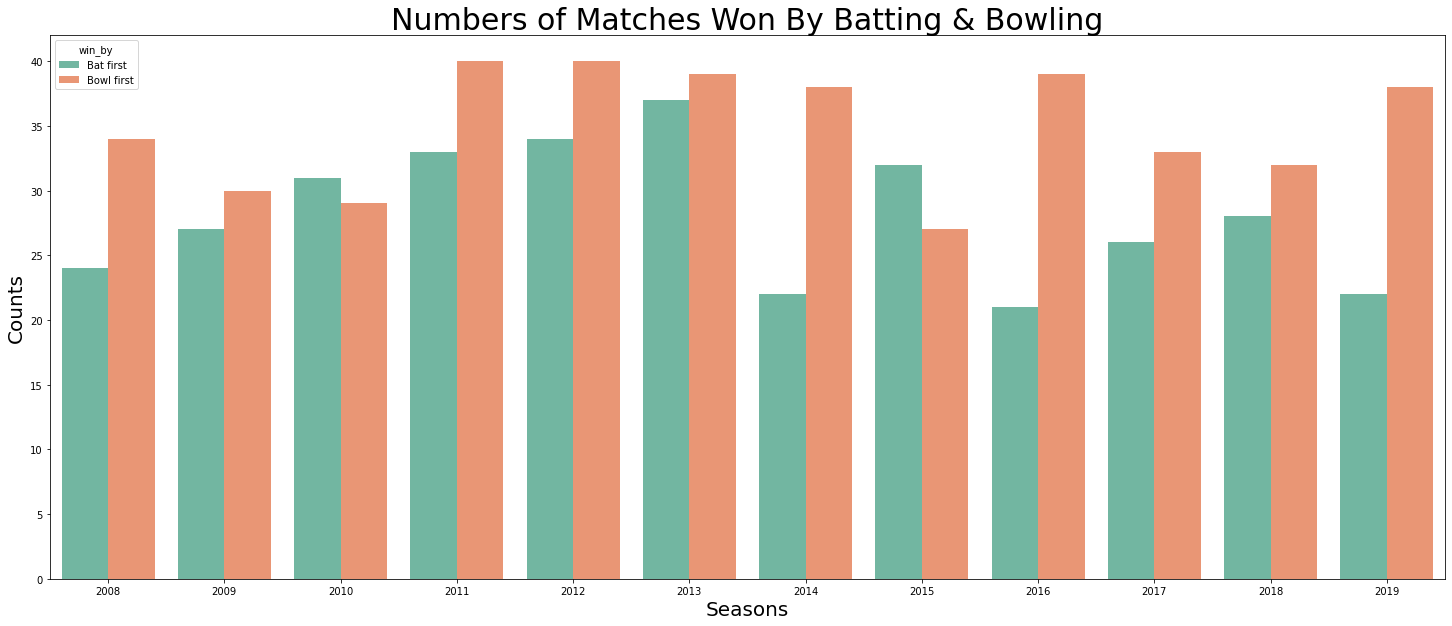

In [25]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['season'], hue=df['win_by'], palette='Set2')
plt.title('Numbers of Matches Won By Batting & Bowling', fontsize=30)
plt.xlabel('Seasons', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.show()

In [26]:
df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

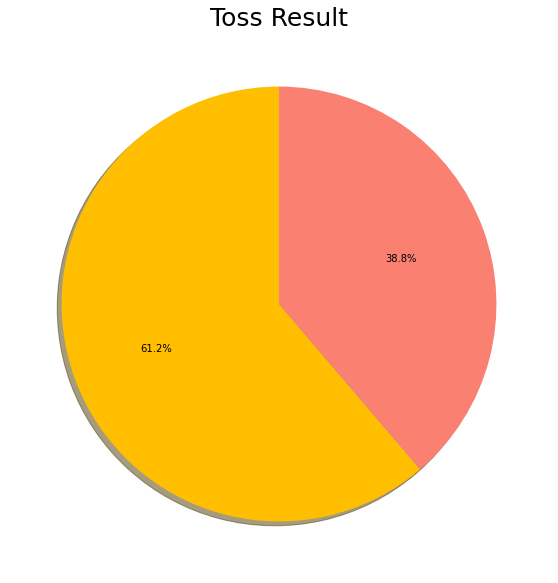

In [28]:
toss = df['toss_decision'].value_counts()
plt.figure(figsize=(25,10))
colors = ['#FFBF00', '#FA8072']
plt.pie(toss, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Toss Result',fontsize=25)
plt.show()

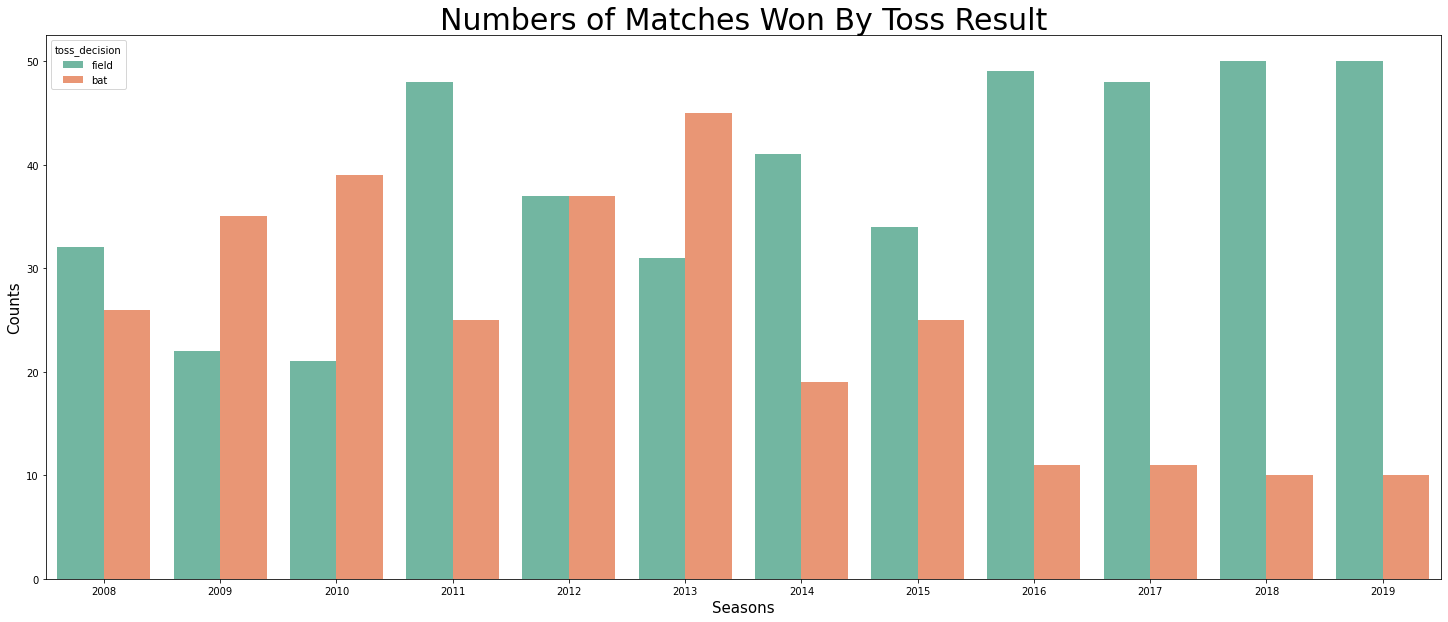

In [29]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['season'], hue=df['toss_decision'], palette='Set2')
plt.title('Numbers of Matches Won By Toss Result', fontsize=30)
plt.xlabel('Seasons', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

In [30]:
final_match = df.drop_duplicates(subset=['season'], keep='last')

In [31]:
final_match[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [32]:
win_match = final_match.win_by.value_counts()

In [33]:
win_match

Bat first     8
Bowl first    4
Name: win_by, dtype: int64

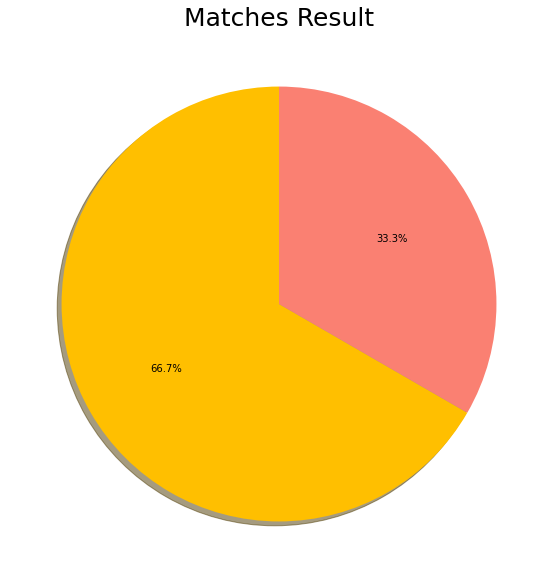

In [34]:
plt.figure(figsize=(25,10))
colors = ['#FFBF00', '#FA8072']
plt.pie(win_match, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Matches Result', fontsize=25)
plt.show()

In [35]:
toss_match = final_match.toss_decision.value_counts()

In [36]:
toss_match

bat      7
field    5
Name: toss_decision, dtype: int64

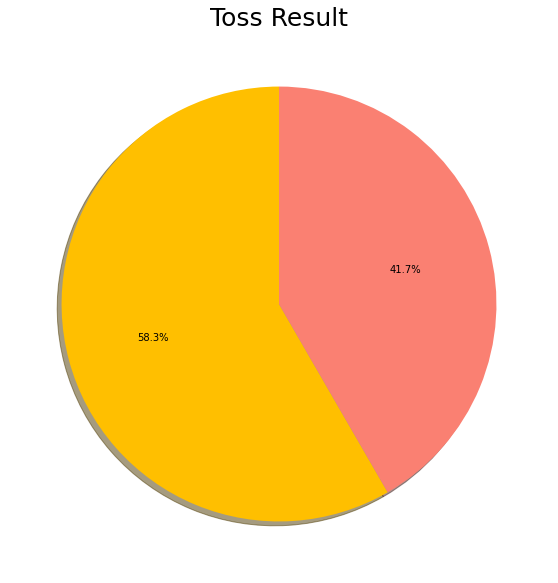

In [37]:
plt.figure(figsize=(25,10))
colors = ['#FFBF00', '#FA8072']
plt.pie(toss_match, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Toss Result', fontsize=25)
plt.show()

<Figure size 1800x720 with 0 Axes>

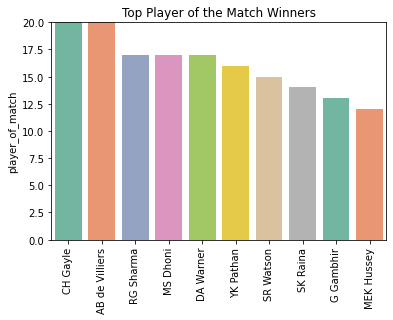

In [40]:
plt.figure(figsize=(25,10))
top_players = df['player_of_match'].value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel('Count')
ax.set_title('Top Player of the Match Winners')
top_players.plot.bar()
sns.barplot(x=top_players.index, y=top_players, orient='v', palette='Set2')
plt.show()

In [41]:
final_match.groupby(['city', 'winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [42]:
final_match['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

<Figure size 1800x720 with 0 Axes>

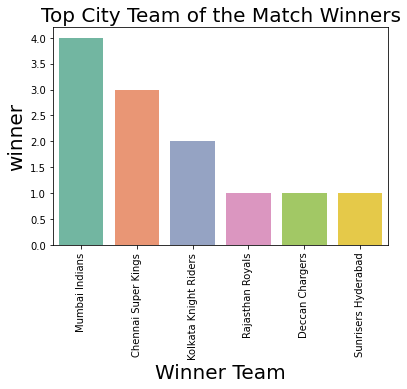

In [44]:
plt.figure(figsize=(25,10))
city_win = final_match['winner'].value_counts()
fig, ax = plt.subplots()
ax.set_xlabel('Winner Team', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Top City Team of the Match Winners', fontsize=20)
city_win.plot.bar()
sns.barplot(x=city_win.index, y=city_win, orient='v', palette='Set2')
plt.show()

In [45]:
final_match[['toss_winner', 'toss_decision', 'winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [46]:
final_match[['winner', 'player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


#### `Findings`

`1. IPL Data of 2008 to 2019`

`2. The Highest Number of Matches Played In IPL Seasons in 2013, 2014 and 2015`

`3. The Highest Number of IPL Matches Won by Mumbai Indian`

`4. Teams Which Bowl First and Highest Chances to Winning the Bat First`

`5. After Winning the Toss Majority of Teams are Decided to do Bowling First`

`6. In Final Team Which Decide to do Bowling First Win the Matches Morethan the Team Which Bat First`

`7. In Final Most of the Teams After Winning the Toss Decide to do the Fielding First`

In [49]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

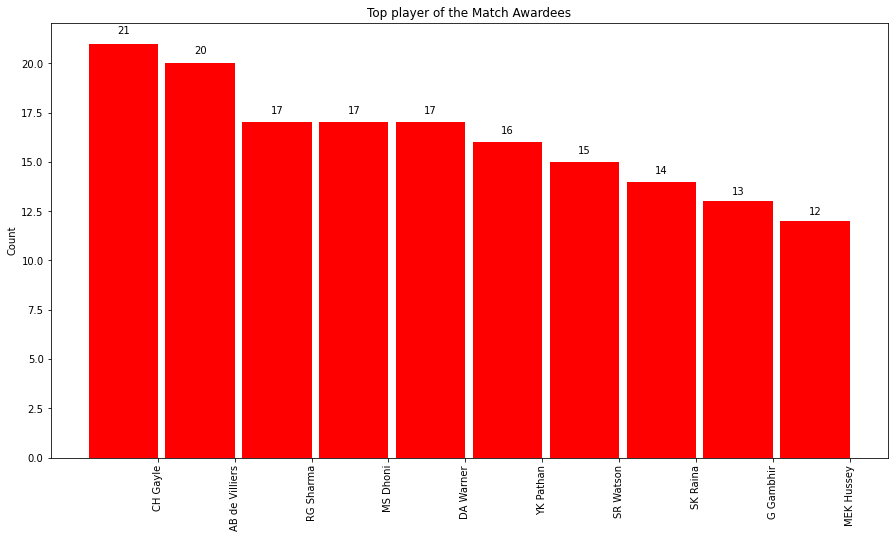

In [55]:
temp_series = df['player_of_match'].value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Top player of the Match Awardees')
autolabel(rects)
plt.show()

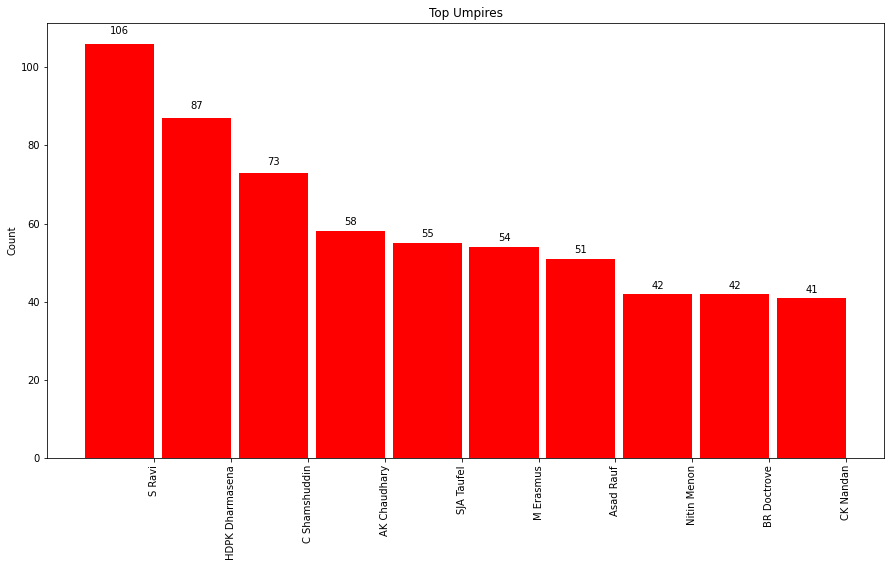

In [53]:
temp_df = pd.melt(df, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Top Umpires')
autolabel(rects)
plt.show()

In [58]:
df_2 = pd.read_csv('deliveries.csv')

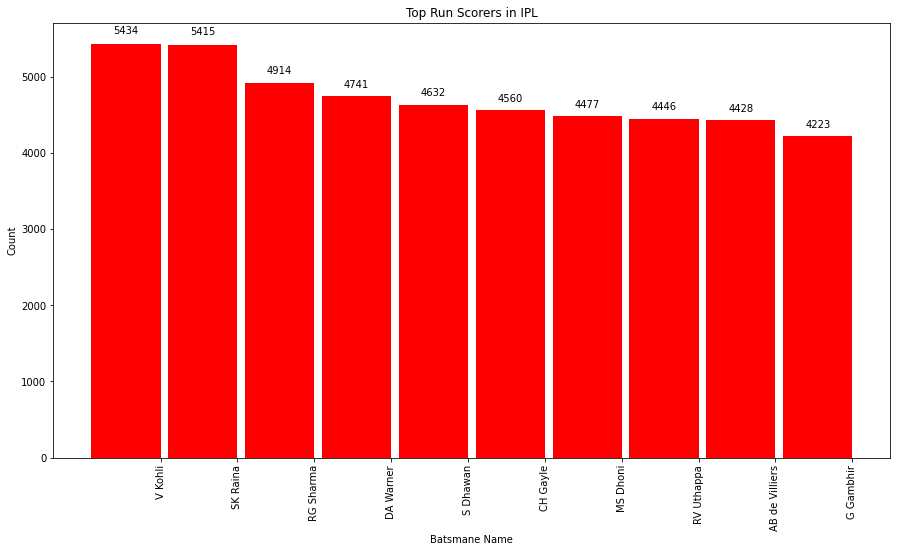

In [59]:
temp_df = df_2.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Top Run Scorers in IPL')
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

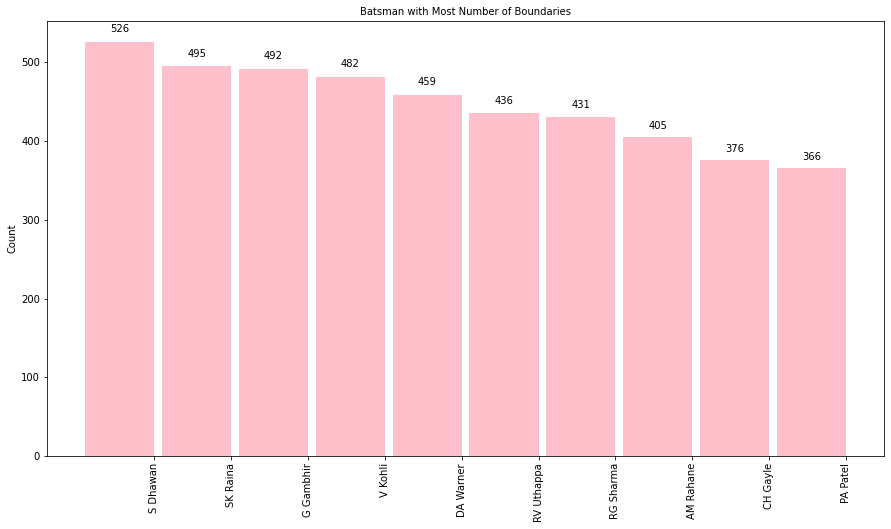

In [60]:
temp_df = df_2.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10, :]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='pink')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title('Batsman with Most Number of Boundaries', fontsize = 10)
autolabel(rects)
plt.show()

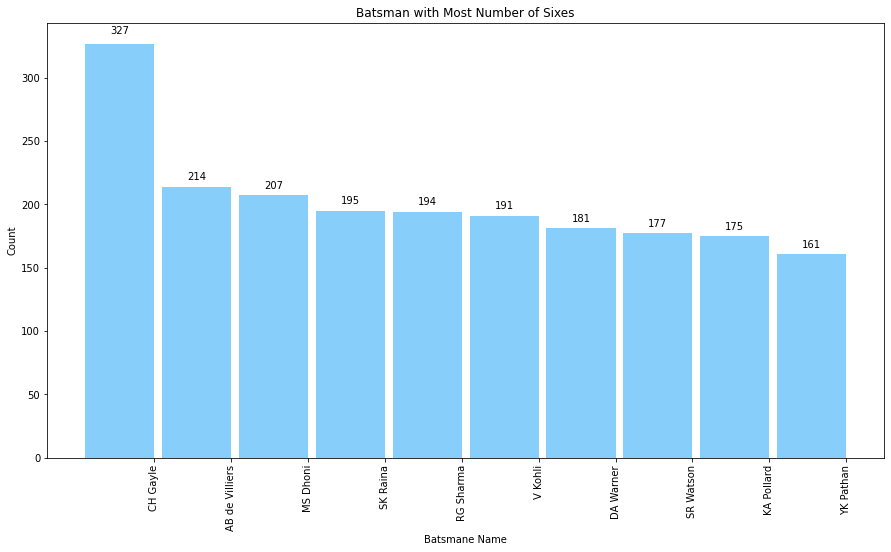

In [61]:
temp_df = df_2.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('Count')
ax.set_title('Batsman with Most Number of Sixes')
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

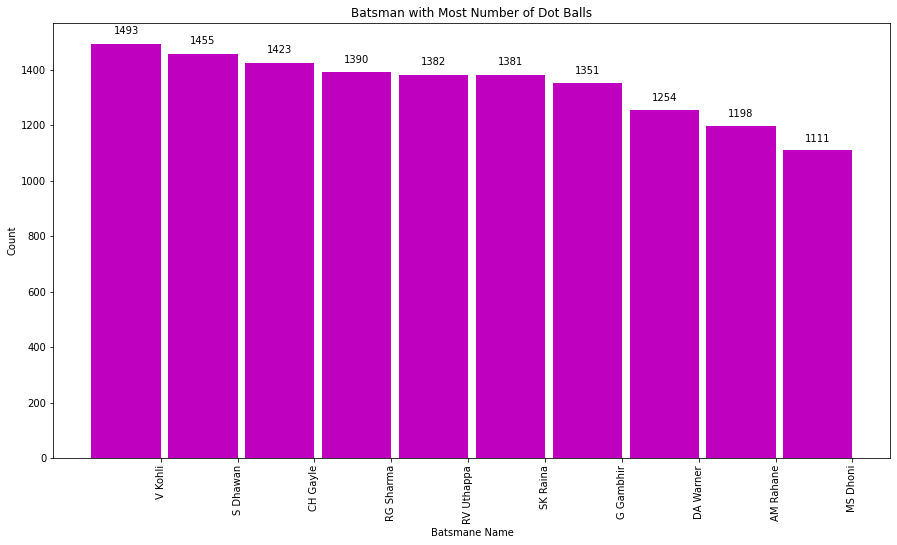

In [62]:
temp_df = df_2.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title('Batsman with Most Number of Dot Balls')
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

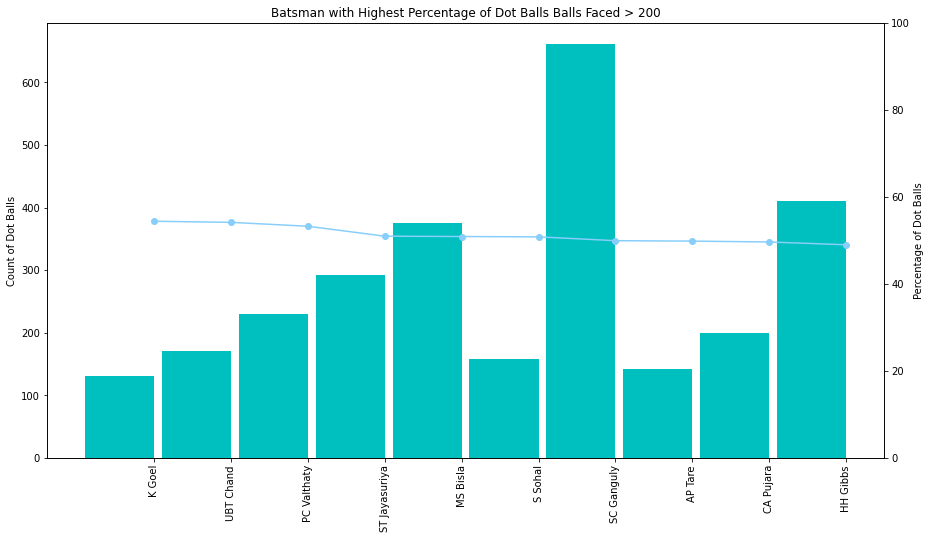

In [68]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = df_2.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax_1 = plt.subplots(figsize=(15,8))
ax_2 = ax_1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax_1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='c')
ax_1.set_xticks(ind+((width)/2.))
ax_1.set_xticklabels(labels, rotation='vertical')
ax_1.set_ylabel('Count of Dot Balls', color='black')
ax_1.set_title('Batsman with Highest Percentage of Dot Balls Balls Faced > 200')
ax_2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='lightskyblue', marker='o')
ax_2.set_ylabel('Percentage of Dot Balls', color='black')
ax_2.set_ylim([0,100])
ax_2.grid(b=False)
plt.show()

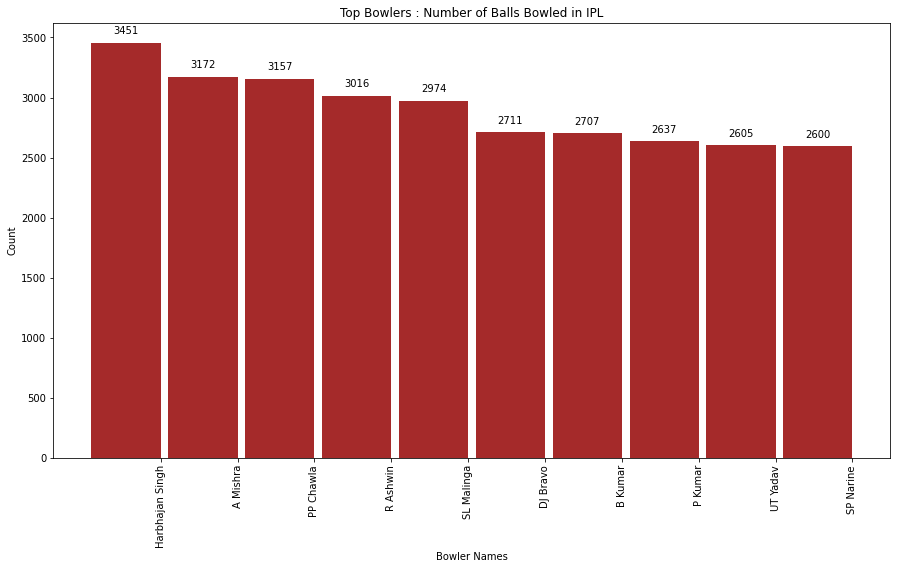

In [71]:
temp_df = df_2.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='brown')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Top Bowlers : Number of Balls Bowled in IPL')
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

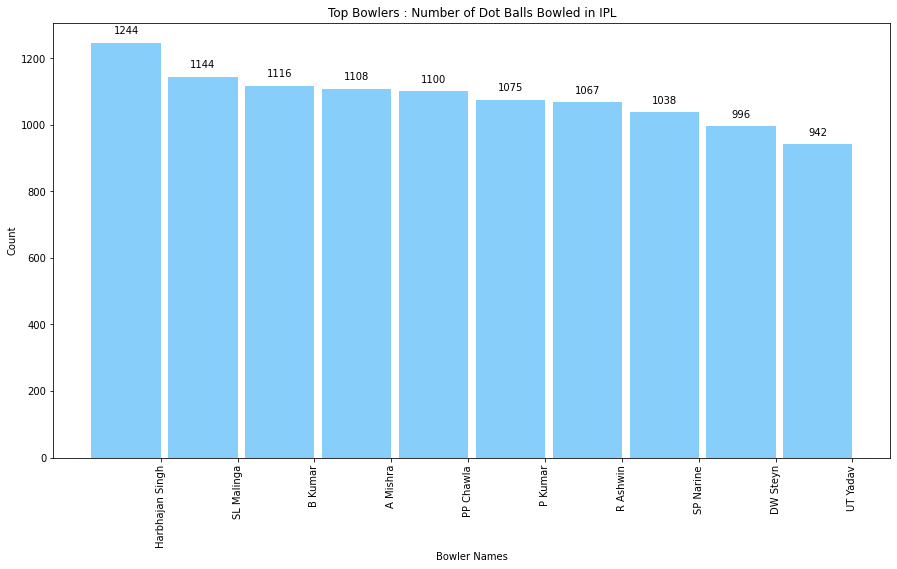

In [74]:
temp_df = df_2.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Top Bowlers : Number of Dot Balls Bowled in IPL')
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

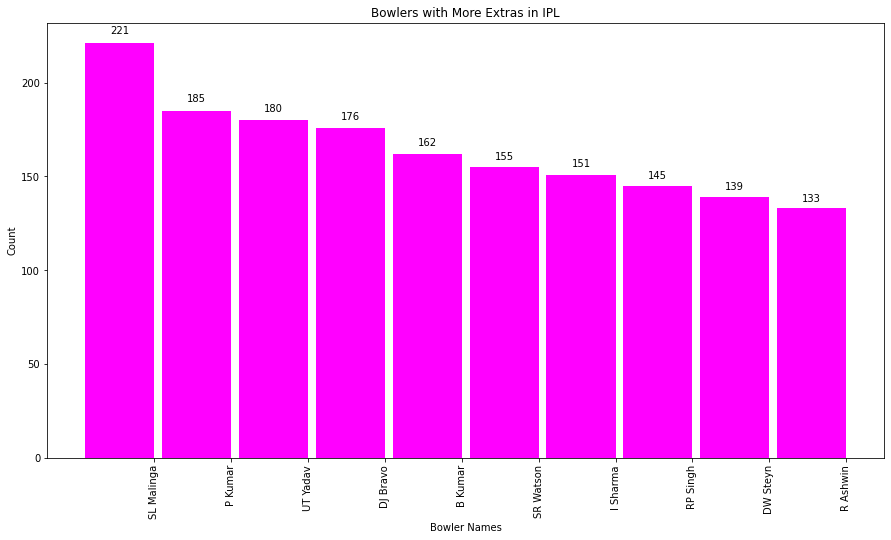

In [73]:
temp_df = df_2.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel('Count')
ax.set_title('Bowlers with More Extras in IPL')
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

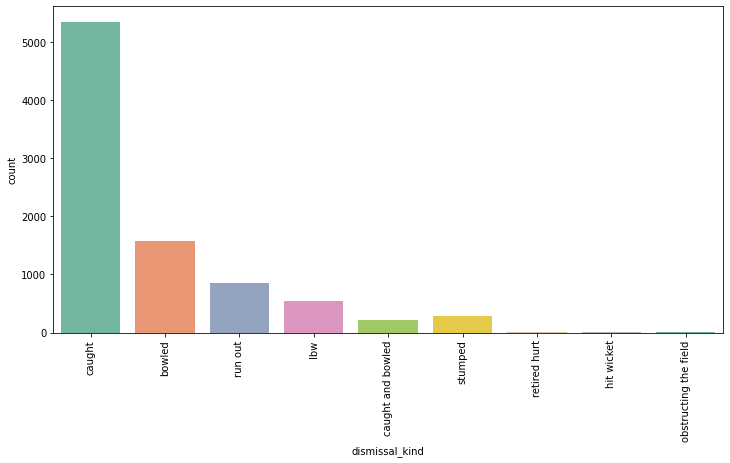

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=df_2, palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

#### `Thank You`